<a href="https://colab.research.google.com/github/mohamedfadul/DeepSearch-Finding-Truncated-Differential-Trails-Using-Genetic-Algorithms-and-Deep-Learning/blob/main/Neural_Network_Model_and_GA_to_Predict_TWINE_Round15_GitHub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 # Use seaborn for pairplot
!pip install -q seaborn
# Use some functions from tensorflow_docs
!pip install -q git+https://github.com/tensorflow/docs
!pip install geneticalgorithm

  Preparing metadata (setup.py) ... done


In [2]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sys

In [3]:
import errno
import os
import signal
import functools

class TimeoutError(Exception):
    pass

def timeout(seconds=10, error_message=os.strerror(errno.ETIME)):
    def decorator(func):
        def _handle_timeout(signum, frame):
            raise TimeoutError(error_message)

        @functools.wraps(func)
        def wrapper(*args, **kwargs):
            signal.signal(signal.SIGALRM, _handle_timeout)
            signal.alarm(seconds)
            try:
                result = func(*args, **kwargs)
            finally:
                signal.alarm(0)
            return result

        return wrapper

    return decorator

In [4]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.12.0


In [5]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [6]:
!wget -O all_dataset_path.csv "https://drive.google.com/uc?export=download&id=1fFa9JQ6yBeYQvqZn7x1b07tSSOryb7bY"

--2023-07-14 05:22:47--  https://drive.google.com/uc?export=download&id=1fFa9JQ6yBeYQvqZn7x1b07tSSOryb7bY
Resolving drive.google.com (drive.google.com)... 172.253.63.138, 172.253.63.100, 172.253.63.101, ...
Connecting to drive.google.com (drive.google.com)|172.253.63.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-54-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/fm2a7p7ptdt7oo6pk2roi6t4t1jtmmma/1689312150000/14347683118445347781/*/1fFa9JQ6yBeYQvqZn7x1b07tSSOryb7bY?e=download&uuid=f50a9812-0638-40b8-b893-009066f8a2e2 [following]
--2023-07-14 05:22:48--  https://doc-08-54-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/fm2a7p7ptdt7oo6pk2roi6t4t1jtmmma/1689312150000/14347683118445347781/*/1fFa9JQ6yBeYQvqZn7x1b07tSSOryb7bY?e=download&uuid=f50a9812-0638-40b8-b893-009066f8a2e2
Resolving doc-08-54-docs.googleusercontent.com (doc-08-54-docs.googleusercontent.com)... 142.251.111.132, 2607

In [7]:
dataset = pd.read_csv('all_dataset_path.csv')

In [8]:
dataset

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,...,perm7,perm8,perm9,perm10,perm11,perm12,perm13,perm14,perm15,perm16
0,0,1,1,1,0,0,0,0,0,1,...,0.2,0.533333,0.866667,0.4,0.6,0.133333,1,0.666667,0.733333,0.933333
1,0,1,1,1,0,0,0,0,0,1,...,0.2,0.533333,0.866667,0.4,0.6,0.133333,1,0.666667,0.733333,0.933333
2,0,1,1,1,0,0,0,0,0,1,...,0.2,0.533333,0.866667,0.4,0.6,0.133333,1,0.666667,0.733333,0.933333
3,0,1,1,1,0,0,0,0,0,1,...,0.2,0.533333,0.866667,0.4,0.6,0.133333,1,0.666667,0.733333,0.933333
4,0,1,1,1,0,0,0,0,0,1,...,0.2,0.533333,0.866667,0.4,0.6,0.133333,1,0.666667,0.733333,0.933333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56707,0,1,0,0,0,0,0,0,0,0,...,0.2,0.533333,0.866667,0.4,0.6,0.133333,1,0.666667,0.733333,0.933333
56708,0,1,0,0,0,0,0,0,0,0,...,0.2,0.533333,0.866667,0.4,0.6,0.133333,1,0.666667,0.733333,0.933333
56709,0,1,0,0,0,0,0,0,0,0,...,0.2,0.533333,0.866667,0.4,0.6,0.133333,1,0.666667,0.733333,0.933333
56710,0,1,0,0,0,0,0,0,0,0,...,0.2,0.533333,0.866667,0.4,0.6,0.133333,1,0.666667,0.733333,0.933333


In [9]:
test_dataset = dataset.sample(frac=0.10,random_state=0)
droped_test_dataset = dataset.drop(test_dataset.index)

In [10]:
scaled_test_labels = test_dataset.pop("scaledsboxes")

In [11]:
test_sboxes = test_dataset.pop("sboxes")

In [12]:
test_dataset

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,...,perm7,perm8,perm9,perm10,perm11,perm12,perm13,perm14,perm15,perm16
27145,0,0,0,0,0,1,0,0,1,1,...,0.2,0.533333,0.866667,0.4,0.6,0.133333,1,0.666667,0.733333,0.933333
52239,0,0,0,0,0,1,0,0,1,1,...,0.2,0.533333,0.866667,0.4,0.6,0.133333,1,0.666667,0.733333,0.933333
10946,0,0,0,0,0,1,0,0,1,1,...,0.2,0.533333,0.866667,0.4,0.6,0.133333,1,0.666667,0.733333,0.933333
31807,0,0,0,0,0,1,0,0,1,1,...,0.2,0.533333,0.866667,0.4,0.6,0.133333,1,0.666667,0.733333,0.933333
24805,0,0,0,0,0,1,0,0,1,1,...,0.2,0.533333,0.866667,0.4,0.6,0.133333,1,0.666667,0.733333,0.933333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31276,0,0,0,0,0,1,0,0,1,1,...,0.2,0.533333,0.866667,0.4,0.6,0.133333,1,0.666667,0.733333,0.933333
20019,0,0,0,0,0,1,0,0,1,1,...,0.2,0.533333,0.866667,0.4,0.6,0.133333,1,0.666667,0.733333,0.933333
27682,0,0,0,0,0,1,0,0,1,1,...,0.2,0.533333,0.866667,0.4,0.6,0.133333,1,0.666667,0.733333,0.933333
48506,0,0,0,0,0,1,0,0,1,1,...,0.2,0.533333,0.866667,0.4,0.6,0.133333,1,0.666667,0.733333,0.933333


In [13]:
def R_squared(y, y_pred):
  y_pred = ops.convert_to_tensor_v2(y_pred)
  y = math_ops.cast(y, y_pred.dtype)
  residual = tf.reduce_sum(tf.square(tf.subtract(y,y_pred)))
  total = tf.reduce_sum(tf.square(tf.subtract(y, tf.reduce_mean(y))))
  r2 = tf.subtract(1.0, tf.math.divide(residual, total))
  return r2

In [14]:
from keras import backend as K
from tensorflow.python.framework import ops
from tensorflow.python.ops import math_ops
def root_mean_squared_error(y_true, y_pred):
        y_pred = ops.convert_to_tensor_v2(y_pred)
        y_true = math_ops.cast(y_true, y_pred.dtype)
        return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [15]:
from keras.layers import Dropout
from keras import regularizers
initializer = tf.keras.initializers.Constant(.0001)
def build_model():
  model = keras.Sequential([
    layers.Dense(512, activation=tf.keras.activations.relu,
                 input_shape=(49,),kernel_regularizer=regularizers.l2(0.1), kernel_initializer=initializer),
    layers.Dropout(0.2),
    layers.Dense(512, activation=tf.keras.activations.relu,kernel_regularizer=regularizers.l2(0.1), kernel_initializer=initializer),
    layers.Dropout(0.2),
    layers.Dense(512, activation=tf.keras.activations.relu,kernel_regularizer=regularizers.l2(0.1), kernel_initializer=initializer),
    layers.Dropout(0.2),
    layers.Dense(512, activation=tf.keras.activations.relu,kernel_regularizer=regularizers.l2(0.1), kernel_initializer=initializer),
    layers.Dropout(0.2),
    layers.Dense(512, activation=tf.keras.activations.relu,kernel_regularizer=regularizers.l2(0.1), kernel_initializer=initializer),
    layers.Dropout(0.2),
    layers.Dense(1)
  ])
  optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.001)
  loss = tf.losses.huber
  model.compile(loss=loss,
                optimizer=optimizer,
                metrics=['mae',root_mean_squared_error,R_squared])
  return model

In [16]:
model = build_model()

In [17]:
prediction_file_id = '1dd2P2zdrhNNsRQmGxeMJmbGyYt2V7GTJ'  # Replace 'your_file_id' with the actual file ID

!wget -O prediction_model_path.h5 "https://drive.google.com/uc?export=download&id={prediction_file_id}"

--2023-07-14 05:22:50--  https://drive.google.com/uc?export=download&id=1dd2P2zdrhNNsRQmGxeMJmbGyYt2V7GTJ
Resolving drive.google.com (drive.google.com)... 172.253.63.138, 172.253.63.100, 172.253.63.101, ...
Connecting to drive.google.com (drive.google.com)|172.253.63.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-54-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/22p9g740o1qrm31c3euj8ljv50igf98q/1689312150000/14347683118445347781/*/1dd2P2zdrhNNsRQmGxeMJmbGyYt2V7GTJ?e=download&uuid=9eb049c5-9a3b-4d0b-b992-0c486419eac8 [following]
--2023-07-14 05:22:53--  https://doc-04-54-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/22p9g740o1qrm31c3euj8ljv50igf98q/1689312150000/14347683118445347781/*/1dd2P2zdrhNNsRQmGxeMJmbGyYt2V7GTJ?e=download&uuid=9eb049c5-9a3b-4d0b-b992-0c486419eac8
Resolving doc-04-54-docs.googleusercontent.com (doc-04-54-docs.googleusercontent.com)... 142.251.111.132, 2607

In [18]:
model.load_weights('prediction_model_path.h5')

In [19]:
from keras.layers import Dropout
from keras import regularizers
from keras.regularizers import l2, l1
reg_param=0.001

def create_model():
  model = keras.Sequential([
        layers.Dense(512, activation='relu' , input_shape=[50]),
        layers.Dense(512, activation='relu'),
        layers.Dense(512, activation='relu'),
        layers.Dense(512, activation='relu'),
        layers.Dense(1,activation='sigmoid' )
  ])

  optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.001)
  #mape = tf.keras.losses.MeanAbsolutePercentageError(tf.losses.Reduction.SUM_OVER_BATCH_SIZE)
  loss = tf.losses.mape
  model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.optimizers.Adam(learning_rate=0.001), metrics=(['accuracy'], ['Precision'],['Recall']))
  return model

In [20]:
validity_model = create_model()

In [21]:
validity_file_id = '1e2T7UBYXFRL31NYZCr7oM4TxP7HdCTmW'  # Replace 'your_file_id' with the actual file ID

!wget -O validity_model_path.h5 "https://drive.google.com/uc?export=download&id={validity_file_id}"

--2023-07-14 05:22:54--  https://drive.google.com/uc?export=download&id=1e2T7UBYXFRL31NYZCr7oM4TxP7HdCTmW
Resolving drive.google.com (drive.google.com)... 172.253.63.138, 172.253.63.100, 172.253.63.101, ...
Connecting to drive.google.com (drive.google.com)|172.253.63.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-54-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/69396n0c1f03cqpq69s1ifeuc1lup1ma/1689312150000/14347683118445347781/*/1e2T7UBYXFRL31NYZCr7oM4TxP7HdCTmW?e=download&uuid=8792317a-502d-422e-83f6-c6c549596a7e [following]
--2023-07-14 05:22:58--  https://doc-04-54-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/69396n0c1f03cqpq69s1ifeuc1lup1ma/1689312150000/14347683118445347781/*/1e2T7UBYXFRL31NYZCr7oM4TxP7HdCTmW?e=download&uuid=8792317a-502d-422e-83f6-c6c549596a7e
Resolving doc-04-54-docs.googleusercontent.com (doc-04-54-docs.googleusercontent.com)... 142.251.111.132, 2607

In [22]:
validity_model.load_weights('validity_model_path.h5')

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


__________________________________________________ 0.4% GA is running...Genetic algorithm terminated successfully.
 The best solution found:
 [1.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         1.         1.         0.
 1.         0.         1.         1.         1.         0.
 0.         1.         0.         0.         0.         1.
 0.         0.         0.15       0.33333333 0.         0.06666667
 0.26666667 0.46666667 0.8        0.2        0.53333333 0.86666667
 0.4        0.6        0.13333333 1.         0.66666667 0.73333333
 0.93333333]

 Objective function:
 26.62392807006836


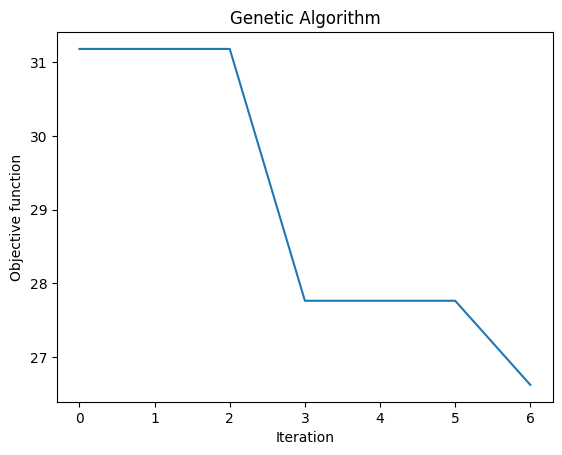

Processing results: None


In [25]:
import numpy as np
from geneticalgorithm import geneticalgorithm as ga
import random
import sys
import signal
from func_timeout import FunctionTimedOut

import traceback
import os

dir_path = '/content/drive/My Drive/Colab Notebooks/Exp6 Data/Results/'
os.makedirs(dir_path, exist_ok=True)

col = ['input1', 'input2', 'input3', 'input4', 'input5', 'input6', 'input7', 'input8', 'input9', 'input10', 'input11', 'input12', 'input13', 'input14', 'input15', 'input16', 'output1', 'output2', 'output3', 'output4', 'output5', 'output6', 'output7', 'output8', 'output9', 'output10', 'output11', 'output12', 'output13', 'output14', 'output15', 'output16', 'sboxes', 'round', 'perm1', 'perm2', 'perm3', 'perm4', 'perm5', 'perm6', 'perm7', 'perm8', 'perm9', 'perm10', 'perm11', 'perm12', 'perm13', 'perm14', 'perm15', 'perm16']
valid_data = pd.DataFrame(index=None, columns=col)

result = "continue"

def handler(signum, frame):
    raise Exception("Function execution timeout")

def process_results(result):
    result = result
    # Your code to process the genetic algorithm results
    # Perform actions such as analyzing the best individual, extracting information, etc.
    print("Processing results:", result)
    # Perform other necessary actions based on the results

def f(x):
    arr = x
    names = columns = test_dataset.columns
    predcited_data = pd.DataFrame([arr], index=names, columns=names)
    predcited_data = tf.slice(predcited_data, [0, 0], [1, 49])

    pen = 0
    if x[0] + x[1] + x[2] + x[3] + x[4] + x[5] + x[6] + x[7] + x[8] + x[9] + x[10] + x[11] + x[12] + x[13] + x[14] + x[15] == 0:
        pen = 100
    if x[16] + x[17] + x[18] + x[19] + x[20] + x[21] + x[22] + x[23] + x[24] + x[25] + x[26] + x[27] + x[28] + x[29] + x[30] + x[31] == 0:
        pen = 100

    predictedScaledSboxes = model.predict(predcited_data, verbose=0)
    predictedScaledSboxes = (predictedScaledSboxes / 100)
    if (predictedScaledSboxes > 0.33) and (predictedScaledSboxes < 0.416) and (pen == 0):
        round_no = 15
        input_output_diff = np.array(predcited_data[0][0:32])
        input_output_diff = np.reshape(input_output_diff, (-1, 32))
        perm = np.array(predcited_data[0][33:49])
        perm = np.reshape(perm, (-1, 16))
        startpoint = np.empty([1, 50])
        startpoint = np.column_stack((input_output_diff, predictedScaledSboxes, round_no, perm))
        startPointsTensor = pd.DataFrame(startpoint, index=None, columns=col)
        global valid_data
        valid_data = pd.concat([valid_data, startPointsTensor], ignore_index=True)
        rows, cols = valid_data.shape
        if rows > 100:
            valid_data['round'] = (valid_data['round']) / 100
            predictions = validity_model.predict(valid_data, verbose=0)
            rounded = [int(np.round(p[0])) for p in predictions]
            startPoints = pd.DataFrame(index=None, columns=col)
            from random import randint
            for idx, r in enumerate(rounded):
                if r == 1:
                    valid_row = np.array(valid_data.loc[idx])
                    valid_row = np.reshape(valid_row, (-1, 50))
                    valid_row = pd.DataFrame(valid_row, index=None, columns=col)
                    startPoints = pd.concat([valid_row, startPoints], ignore_index=True)
            num_rows, num_cols = startPoints.shape
            for k in range(num_rows):
                n = randint(0, num_rows - 1)
                f = open('/content/drive/My Drive/Colab Notebooks/Exp6 Data/Results/twine' + str(k) + '.yaml', "w")
                sweight = round(valid_data.iloc[n][32] * 8 * 15)
                sweight = str(sweight)
                endweight = round(valid_data.iloc[n][32] * 8 * 15) + 1
                endweight = str(endweight)
                f.write("cipher: twine\n")
                f.write("wordsize: 64\n")
                f.write("mode: 0\n")
                f.write("endweight: " + endweight + "\n")
                f.write("sweight: " + sweight + "\n")
                f.write("rounds: 15\n")
                f.write("fixedVariables:\n")
                for i in range(16):
                    if valid_data.iloc[n][i] == 0:
                        a = (i * 4) + 3
                        b = (i * 4)
                        f.write("- X0[" + str(a) + ":" + str(b) + "]: \"0x0\"\n")
                    elif valid_data.iloc[n][i] == 1:
                        a = (i * 4) + 3
                        b = (i * 4)
                        f.write("- NOT (X0[" + str(a) + ":" + str(b) + "]: \"0x0)\"\n")
                for i in range(16, 32):
                    if valid_data.iloc[n][i] == 0:
                        c = ((i - 16) * 4) + 3
                        d = ((i - 16) * 4)
                        f.write("- X15[" + str(c) + ":" + str(d) + "]: \"0x0\"\n")
                    elif valid_data.iloc[n][i] == 1:
                        c = ((i - 16) * 4) + 3
                        d = ((i - 16) * 4)
                        f.write("- NOT (X15[" + str(c) + ":" + str(d) + "]: \"0x0)\"\n")
                f.close()
                f = open('/content/drive/My Drive/Colab Notebooks/Exp6 Data/Results/twine samples commands.txt', "a")
                f.write("sudo python3 cryptosmt.py --input twine" + str(k) + ".yaml >>Results/result" + str(k) + ".txt;\n")

            result = "termination_value"

            if result == "termination_value":
              print("Genetic algorithm terminated successfully.")
              GAmodel.iterate = 0
              #sys.exit(1)

    return model.predict(predcited_data, verbose=0).flatten() + pen

signal.signal(signal.SIGALRM, handler)  # Set the signal handler

try:
    varbound=np.array([[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0.15,0.15],[test_dataset.perm1.values[0],test_dataset.perm1.values[0]],[test_dataset.perm2.values[0],test_dataset.perm2.values[0]],[test_dataset.perm3.values[0],test_dataset.perm3.values[0]],[test_dataset.perm4.values[0],test_dataset.perm4.values[0]],[test_dataset.perm5.values[0],test_dataset.perm5.values[0]],[test_dataset.perm6.values[0],test_dataset.perm6.values[0]],[test_dataset.perm7.values[0],test_dataset.perm7.values[0]],[test_dataset.perm8.values[0],test_dataset.perm8.values[0]],[test_dataset.perm9.values[0],test_dataset.perm9.values[0]],[test_dataset.perm10.values[0],test_dataset.perm10.values[0]],[test_dataset.perm11.values[0],test_dataset.perm11.values[0]],[test_dataset.perm12.values[0],test_dataset.perm12.values[0]],[test_dataset.perm13.values[0],test_dataset.perm13.values[0]],[test_dataset.perm14.values[0],test_dataset.perm14.values[0]],[test_dataset.perm15.values[0],test_dataset.perm15.values[0]],[test_dataset.perm16.values[0],test_dataset.perm16.values[0]]])
    vartype=np.array([['int'],['int'],['int'],['int'],['int'],['int'],['int'],['int'],['int'],['int'],['int'],['int'],['int'],['int'],['int'],['int'],['int'],['int'],['int'],['int'],['int'],['int'],['int'],['int'],['int'],['int'],['int'],['int'],['int'],['int'],['int'],['int'],['real'],['real'],['real'],['real'],['real'],['real'],['real'],['real'],['real'],['real'],['real'],['real'],['real'],['real'],['real'],['real'],['real']])
    GAmodel=ga(function=f,dimension=49,variable_type_mixed=vartype,variable_boundaries=varbound,function_timeout=10)
    result = GAmodel.run()
except FunctionTimedOut:
    print("Genetic algorithm execution timed out.")
    traceback.print_exc()
    sys.exit(1)
except AssertionError as e:
    print("Genetic algorithm execution failed:", str(e))
    traceback.print_exc()
    sys.exit(1)

if result == "termination_value":
    print("Genetic algorithm terminated successfully.")
    process_results(result)
    # Perform other necessary actions
    sys.exit(1)
else:
    process_results(result)
